In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import odeint

**Minimal model of 3-protein repressilator**

$\qquad\lambda$: production rate

$\qquad K_{i}$: protein level at half repression

$\qquad n$: Hill coefficient

$\qquad$ Protein degradation rate are set to 1 $\quad \rightarrow \quad \begin{align}&-\text{unit of time: average protein lifetime}\\&-\text{unit of production rate: protein produced per protein lifetime}\end{align}$

$$\begin{align}
p_i &\xrightarrow{\lambda\frac{1}{1+{\left(\frac{p_{j}}{K_{j}}\right)}^{n_{j}}}} p_{i}+1 \qquad j=i-1\\
p_i &\xrightarrow{p_{i}} p_{i}-1
\end{align}
$$


**Minimal Deterministic simulation**

infinitely fast mRNA dynamics

In [29]:
# ODE system

def repressilator(p, t, l, K, n):
    p_shift = np.roll(p,1) # p_{j}
    K_shift = np.roll(K,1) # K_{j}
    n_shift = np.roll(n,1) # n_{j}
    dpdt = l*(1/(1+np.power(p_shift/K_shift,n)))-p
    return dpdt

In [87]:
#parameters

# Identical parameters for now, asyymetry possible

# Protein production rate
l = np.array([11*90,11*90,11*90]) # --> protein life time 90 min
# Michaelis Menten constant
K = np.array([0.002,0.02,0.02])
# Hill coefficient
n = np.array([4,4,4])

In [88]:
# Initial conditions

p0 = np.array([1000,0,0])

In [89]:
# Run

t = np.linspace(0,50,1001) 
p = odeint(repressilator, p0, t, args=(l, K, n))

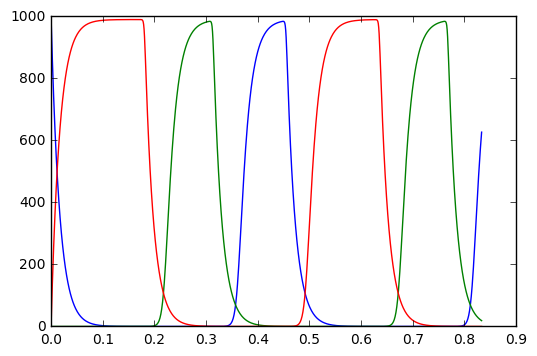

In [90]:

plt.plot(t/60,p[:,0],label='Protein 1')
plt.plot(t/60,p[:,1],label='Protein 2')
plt.plot(t/60,p[:,2],label='Protein 3')